In [1]:
import vgg16
reload(vgg16)

Using Theano backend.


<module 'vgg16' from 'vgg16.pyc'>

In [2]:
model = vgg16.vgg16(backendWeightsFile='vgg16_weights.h5', frontendWeightsFile='bottleneck_fc_model_100epochs_300_adagrad.h5')

Backend model loaded.
Frontend model loaded.


In [3]:
from skimage.io import imread

In [4]:
img = imread('/Users/dave/Data/DogsvCats/test/1.jpg')

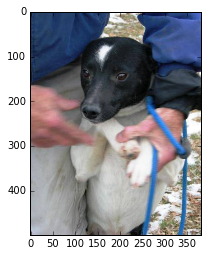

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)

In [6]:
img.shape

(499, 381, 3)

In [7]:
from skimage.transform import resize

In [8]:
img = resize(img, (150, 150))

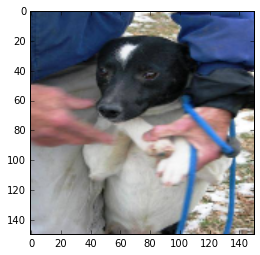

In [9]:
plt.imshow(img)

In [10]:
img = img.transpose((2, 0, 1))

In [11]:
img.shape

(3, 150, 150)

In [12]:
model.predict(img.reshape(-1, 3, 150, 150))

array([[ 0.99997532]], dtype=float32)

In [13]:
img = imread('/Users/dave/Data/DogsvCats/test/10.jpg')

In [14]:
img = resize(img, (150, 150))

In [15]:
img = img.transpose((2, 0, 1))

In [16]:
model.predict(img.reshape(-1, 3, 150, 150))

array([[ 0.00015417]], dtype=float32)

In [17]:
import numpy as np
import pandas as pd

In [18]:
from tqdm import tqdm_notebook

In [19]:
from os.path import join
inDir = '/Users/dave/Data/DogsvCats/test'
results = np.zeros((12500, 1))
for k in tqdm_notebook(range(12500)):
    img = imread(join(inDir, '{}.jpg'.format(k + 1)))
    img = resize(img, (150, 150))
    img = img.transpose((2, 0, 1))
    results[k] = model.predict(img.reshape(-1, 3, 150, 150))

In [20]:
df = pd.DataFrame(results, columns=['label'])
df.index = np.arange(1, len(df) + 1)
df.index.names=['id']

In [21]:
df.to_csv('20160913_DawgsvKats_Results_100Epochs_VGG16_300_adagrad_v5.csv', float_format='%0.3f')